# I. Exploring Principal Component Analysis (PCA) on Multiple Dataset

### Importing Libraries and Data

In [10]:
import pandas as pd
import numpy as np
#preparing dataset
df2 = pd.read_csv('surveydata.csv')
ecom = pd.read_csv("ecommercedata.csv")
#for dealing with large dataset - example only
fash = pd.read_csv("picdata.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'picdata.csv'

In [ ]:
df2.head()

,Respondent,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8a,Q8b,...,Q20,Q21,Q22,Q23,Q24,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34
0,1,Increasing pay,Full Time,3.0,Additional funding for Counselling,No,1,No,1,3,...,4,More women in leadership positions,Yes,East,15.0,NaN,NaN,NaN,NaN,NaN
1,2,Improve benefits,Full Time,1.0,Drug coverage,Yes,3,Yes,3,4,...,4,NaN,No,North,2.0,NaN,NaN,NaN,NaN,NaN
2,3,Job security,Part Time,NaN,NaN,No,1,No,3,1,...,5,NaN,No,North,NaN,NaN,NaN,NaN,NaN,NaN
3,4,Job security,Part Time,NaN,NaN,I don't know,4,No,3,2,...,4,NaN,Yes,East,1.0,NaN,NaN,NaN,NaN,NaN
4,5,Improve working conditions,Full Time,3.0,Wellness account,Yes,3,No,2,3,...,2,Visible minorities are not given same project ...,Prefer not to answer,South,6.0,NaN,NaN,NaN,NaN,NaN


In [ ]:
fash.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,target
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9


In [ ]:
ecom.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


### PCA on E-commerce Data

In [ ]:
## Principal Component Analysis (PCA)
#starting with ecommerce data
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
#filter dataset and standardize
ecom = ecom[ecom.columns[3:]]
scaler = StandardScaler()
scale_data = scaler.fit_transform(ecom)
#just for starter (can be changed later)
#we get the PCA - with 4 components
#this can change depending on the threshold established at the start of the analysis
#n_components can vary
pca = PCA(n_components=4)
pca.fit_transform(scale_data)
#we get the sum of the explained variance ratio to determine if the
#n_compoents used in PCA is sufficient to consider threshold
vr = sum(pca.explained_variance_ratio_)
vr

0.9983899829672888

### Variance Plot (E-commerce)

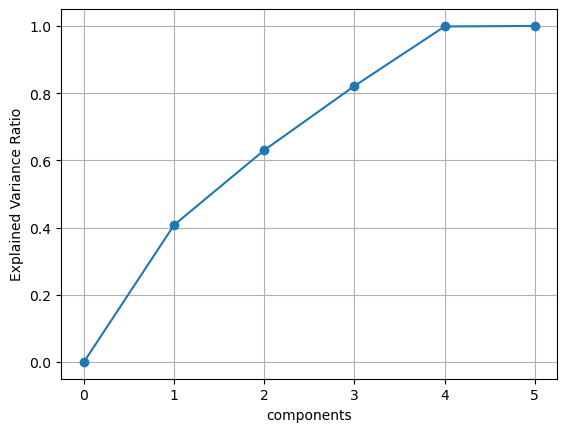

In [ ]:
#establish the data points for the plots
#get the range to consider - n_components to be used plotting the graph
#to show explained variance ratio of each component - cumulative
#range is 0 to 5 not including 6 - exclusive
nums = range(0, 5+1)
#array to store total variance ratio per component
var_ratio = []
for num in nums:
    pca = PCA(n_components=num)
    pca.fit(scale_data)
    var_ratio.append(np.sum(pca.explained_variance_ratio_))
#plot the computed variance ratio per component
import matplotlib.pyplot as plt
plt.plot(nums, var_ratio, marker='o')
plt.xlabel('components')
plt.ylabel('Explained Variance Ratio')
plt.grid()
plt.show()

### Scree Plot Function (E-commerce)

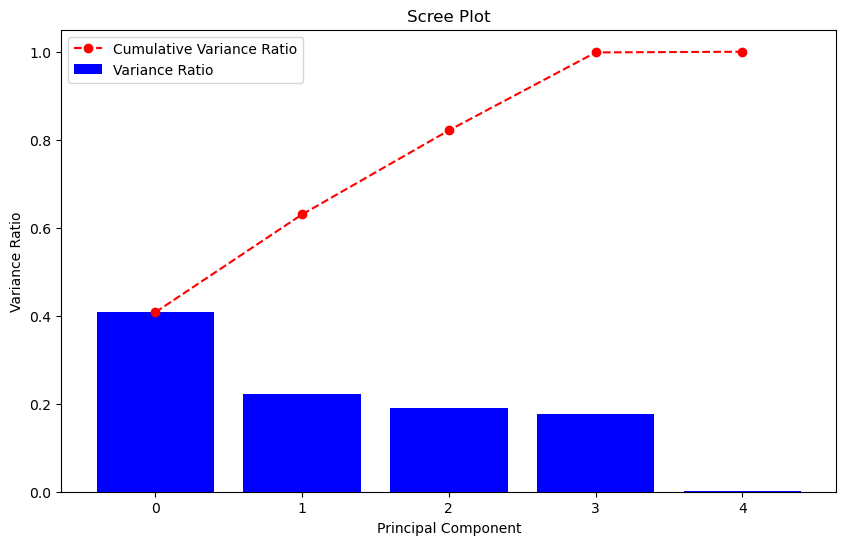

In [ ]:
#analyze the graph
def scree_plot(pca):
    num_components = len(pca.explained_variance_ratio_)
    indices = np.arange(num_components)
    variance_ratio = pca.explained_variance_ratio_
    cumulative_variance_ratio = np.cumsum(variance_ratio)
    plt.figure(figsize=(10, 6))
    plt.bar(indices, variance_ratio, color='blue', label='Variance Ratio')
    plt.plot(indices, cumulative_variance_ratio, marker='o', color='red', linestyle='--',
    label='Cumulative Variance Ratio')
    plt.xlabel('Principal Component')
    plt.ylabel('Variance Ratio')
    plt.title('Scree Plot')
    plt.legend()
    plt.show()
scree_plot(pca)


### PCA on Survey Data with Variance Plot

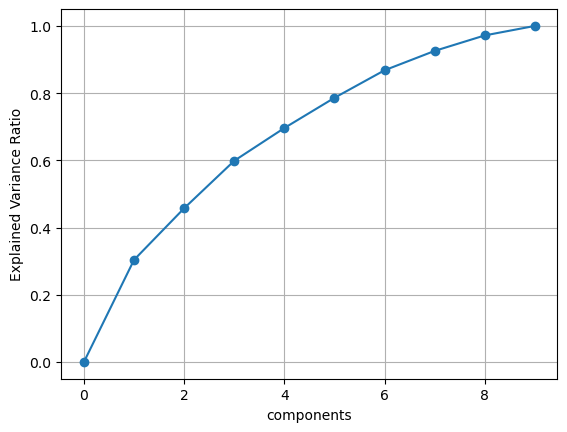

In [ ]:
#using the survey data
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
df2.head()

#for sample purposes - choose any column
df_likert = df2[["Q6", "Q10", "Q11", "Q12", "Q13", "Q14", "Q15", "Q18", "Q20"]].copy()
#remove missing values
df_likert = df_likert.dropna()
#standardize data
scaler = StandardScaler()
scale_data = scaler.fit_transform(df_likert)
#range is 0 to 5 not including 6 - exclusive
nums = range(0, 9+1)
var_ratio = []
for num in nums:
    pca = PCA(n_components=num)
    pca.fit(scale_data)
    var_ratio.append(np.sum(pca.explained_variance_ratio_))
#plot the computed variance ratio per component
plt.plot(nums, var_ratio, marker='o')
plt.xlabel('components')
plt.ylabel('Explained Variance Ratio')
plt.grid()
plt.show()


### Scree Plot Function (Survey Data)

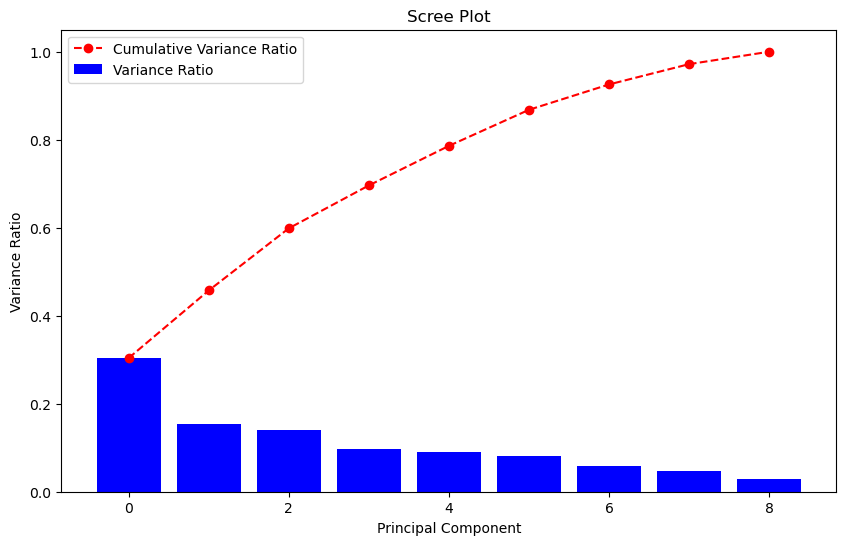

In [ ]:
#analyze result
def scree_plot(pca):
    num_components = len(pca.explained_variance_ratio_)
    indices = np.arange(num_components)
    variance_ratio = pca.explained_variance_ratio_
    cumulative_variance_ratio = np.cumsum(variance_ratio)
    plt.figure(figsize=(10, 6))
    plt.bar(indices, variance_ratio, color='blue', label='Variance Ratio')
    plt.plot(indices, cumulative_variance_ratio, marker='o', color='red', linestyle='--',
    label='Cumulative Variance Ratio')
    plt.xlabel('Principal Component')
    plt.ylabel('Variance Ratio')
    plt.title('Scree Plot')
    plt.legend()
    plt.show()
scree_plot(pca)


### PCA on Pic Dataset (Image Data)

In [ ]:
#picdataset
#to show the use of PCA using a large dataset
x = fash.iloc[:, :784]

y = fash.iloc[:, -1]
#dataset representing an image where each pixel represent the matrix (10000rowsx785 columns)
#numbers 1 to 254 representing how dark is the color of the pixel
x = x[:10000]
x


,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


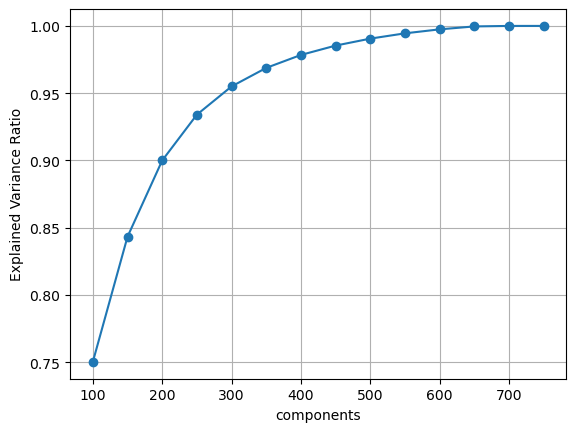

In [ ]:
#large dataset using incremental PCA
#or regular PCA - for discussion purposes
#add data in batches to manage efficiently
from sklearn.decomposition import IncrementalPCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
scaler = StandardScaler()
scale_data = scaler.fit_transform(x)
#range of numbers starting from 100, ending at 784 (inclusive), with a step size of 50.
#sequence will start at 100, increment by 50 for each subsequent number, and stop before or at 785.
batch_size = None
nums = range(100, 784+1, 50)
var_ratio = []
for num in nums:
    ipca = IncrementalPCA(n_components=num, batch_size=batch_size)
    ipca.fit(scale_data)
    var_ratio.append(np.sum(ipca.explained_variance_ratio_))
plt.plot(nums, var_ratio, marker='o')
plt.xlabel('components')
plt.ylabel('Explained Variance Ratio')
plt.grid()
plt.show()

ipca = IncrementalPCA(n_components=200)
x_new = ipca.fit_transform(scale_data)


# II. Classification Model Development

### 1. Data Exploration

In [ ]:
import pandas as pd

#Load the dataset
df = pd.read_csv('glass.csv')

#Display the first few rows
print("First 5 rows of the dataset:")
print(df.head())

#Check the shape of the dataset
print("\nDataset shape (rows, columns):", df.shape)

#Check for missing values
print("\nMissing values per column:")
print(df.isnull().sum())

#Check for duplicates
print("\nNumber of duplicate rows:", df.duplicated().sum())
print(df.iloc[:, -1].value_counts())

First 5 rows of the dataset:
   idno       RI     Na    Mg    Al     Si     K    Ca   Ba   Fe  type
0     1  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.0     1
1     2  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.0     1
2     3  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.0     1
3     4  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.0     1
4     5  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.0     1

Dataset shape (rows, columns): (214, 11)

Missing values per column:
idno    0
RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
type    0
dtype: int64

Number of duplicate rows: 0
type
2    76
1    70
7    29
3    17
5    13
6     9
Name: count, dtype: int64


### 2. Data Preprocessing

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load dataset without headers
column_names = ['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'GlassType']
glass = pd.read_csv('glass.csv', header=None, names=column_names)

# Handle duplicates
initial_count = len(glass)
glass = glass.drop_duplicates()
print(f"Removed {initial_count - len(glass)} duplicate rows")
print(f"New shape: {glass.shape}")

# Convert all feature columns to numeric
feature_cols = glass.columns[:-1]
glass[feature_cols] = glass[feature_cols].apply(pd.to_numeric, errors='coerce')

# Handle missing values
print("\nMissing values after conversion:")
print(glass.isnull().sum())
glass = glass.dropna()
print(f"Shape after dropping missing values: {glass.shape}")

# Cell 4: Outlier removal
def remove_outliers(df, columns):
    clean_df = df.copy()
    for col in columns:
        Q1 = clean_df[col].quantile(0.25)
        Q3 = clean_df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        clean_df = clean_df[(clean_df[col] >= lower_bound) & (clean_df[col] <= upper_bound)]
    return clean_df

initial_rows = len(glass)
glass = remove_outliers(glass, feature_cols)
print(f"\nRemoved {initial_rows - len(glass)} outlier rows")
print(f"New shape after outlier removal: {glass.shape}")

# Remove constant features
constant_features = []
for col in feature_cols:
    if glass[col].nunique() == 1:
        constant_features.append(col)

if constant_features:
    print(f"\nRemoving constant features: {constant_features}")
    glass = glass.drop(columns=constant_features)
    feature_cols = [col for col in feature_cols if col not in constant_features]

# Separate features and target
X = glass[feature_cols]
y = glass['GlassType']

# Scale features
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=feature_cols, index=X.index)

# Save processed data for next part
preprocessed = pd.concat([X_scaled, y], axis=1)
preprocessed.to_csv('preprocessed_glass1.csv', index=False)

Removed 1 duplicate rows
New shape: (214, 10)

Missing values after conversion:
RI           1
Na           1
Mg           1
Al           1
Si           1
K            1
Ca           1
Ba           1
Fe           1
GlassType    0
dtype: int64
Shape after dropping missing values: (213, 10)

Removed 109 outlier rows
New shape after outlier removal: (104, 10)

Removing constant features: ['Ba']


### 3. Cummulative Variance


Class Distribution:
GlassType
1    45
2    48
3    11
Name: count, dtype: int64

PCA Analysis Results:
Original dimensions: 8
Components needed for 90% variance: 5
Explained variance: 90.16%


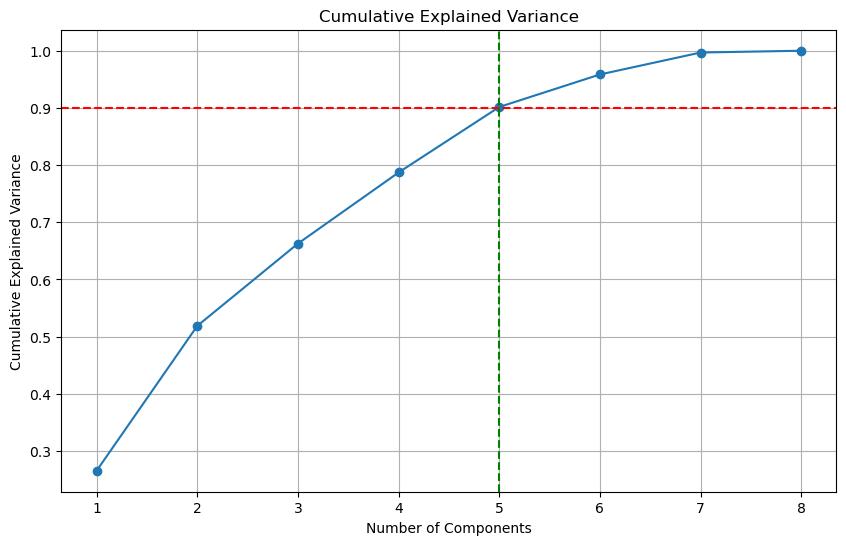

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import (accuracy_score, classification_report,
                             confusion_matrix, f1_score)
import warnings

# Suppress specific warnings
warnings.filterwarnings('ignore', category=UserWarning, module='sklearn')

# === Load and prepare data ===
df = pd.read_csv('preprocessed_glass.csv')
X = df.drop('GlassType', axis=1)
y = df['GlassType']

# Print class distribution
print("\nClass Distribution:")
print(y.value_counts().sort_index())

X = X.values
y = y.values

# === Perform PCA and plot cumulative explained variance ===
pca = PCA()
X_pca_full = pca.fit_transform(X)

cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
n_components = np.argmax(cumulative_variance >= 0.90) + 1

print(f"\nPCA Analysis Results:")
print(f"Original dimensions: {X.shape[1]}")
print(f"Components needed for 90% variance: {n_components}")
print(f"Explained variance: {cumulative_variance[n_components-1]:.2%}")

# Plot cumulative variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance)+1), cumulative_variance, 'o-')
plt.axhline(y=0.9, color='r', linestyle='--')
plt.axvline(x=n_components, color='g', linestyle='--')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

# Apply PCA with reduced components
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X)

### 4. Evaluating Full Features Model


Evaluating Full Features Model
Classification Report (Fold 1):
              precision    recall  f1-score   support

           1       0.89      0.89      0.89         9
           2       0.90      0.90      0.90        10
           3       1.00      1.00      1.00         2

    accuracy                           0.90        21
   macro avg       0.93      0.93      0.93        21
weighted avg       0.90      0.90      0.90        21



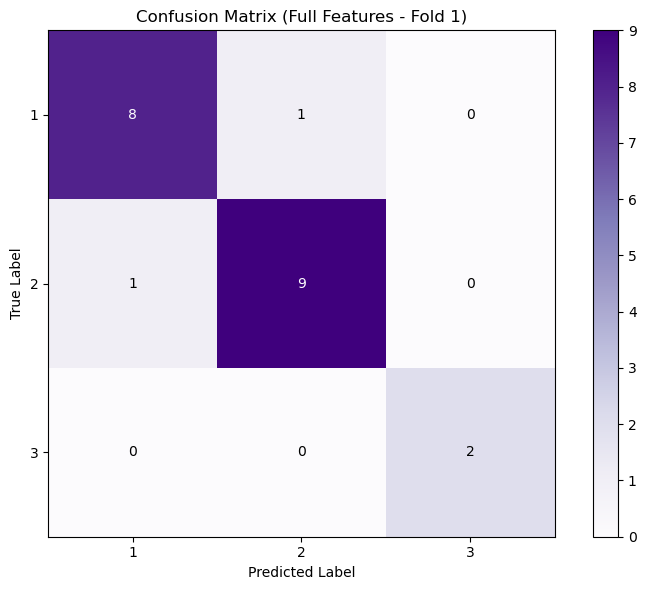


Full Features Performance Summary (8-fold CV):
Average Accuracy: 0.8333 ± 0.0532
Average F1 Score: 0.8333 ± 0.0554
Accuracy Range: 0.7619 - 0.9048


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import (accuracy_score, classification_report,
                             confusion_matrix, f1_score)
import warnings

# Suppress specific warnings
warnings.filterwarnings('ignore', category=UserWarning, module='sklearn')

# Evaluate Model with 8-Fold Stratified ShuffleSplit
model = RandomForestClassifier(random_state=42)
cv = StratifiedShuffleSplit(n_splits=8, test_size=0.2, random_state=42)

accuracies = []
f1_scores = []

print(f"\n{'='*50}")
print(f"Evaluating Full Features Model")
print('='*50)

for fold, (train_idx, test_idx) in enumerate(cv.split(X, y)):
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    accuracies.append(acc)
    f1_scores.append(f1)

    if fold == 0:
        # Classification Report for the first fold
        print("Classification Report (Fold 1):")
        print(classification_report(y_test, y_pred, zero_division=0))

        # Confusion Matrix for the first fold
        cm = confusion_matrix(y_test, y_pred)
        plt.figure(figsize=(8, 6))
        plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Purples)
        plt.title(f'Confusion Matrix (Full Features - Fold 1)')
        plt.colorbar()
        plt.xlabel('Predicted Label')
        plt.ylabel('True Label')
        plt.xticks(np.arange(len(np.unique(y))), np.unique(y))
        plt.yticks(np.arange(len(np.unique(y))), np.unique(y))

        # Add text annotations
        for i in range(cm.shape[0]):
            for j in range(cm.shape[1]):
                plt.text(j, i, format(cm[i, j], 'd'),
                         ha="center", va="center",
                         color="white" if cm[i, j] > cm.max()/2 else "black")
        plt.tight_layout()
        plt.show()

# Print performance summary
print(f"\n{'='*50}")
print(f"Full Features Performance Summary (8-fold CV):")
print('='*50)
print(f"Average Accuracy: {np.mean(accuracies):.4f} ± {np.std(accuracies):.4f}")
print(f"Average F1 Score: {np.mean(f1_scores):.4f} ± {np.std(f1_scores):.4f}")
print(f"Accuracy Range: {min(accuracies):.4f} - {max(accuracies):.4f}")

### 5. Evaluating PCA-Reduced (5 components Model)

Classification Report (PCA-Reduced 5 Components - Fold 1):
              precision    recall  f1-score   support

           1       0.73      0.89      0.80         9
           2       0.80      0.80      0.80        10
           3       0.00      0.00      0.00         2

    accuracy                           0.76        21
   macro avg       0.51      0.56      0.53        21
weighted avg       0.69      0.76      0.72        21



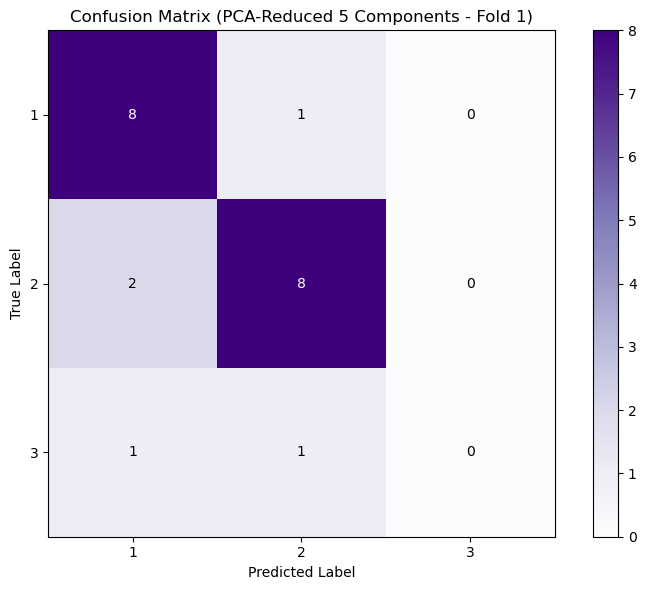

PCA-Reduced (5 components) Performance Summary (8-fold CV):
Average Accuracy: 0.7321 ± 0.0671
Average F1 Score: 0.7159 ± 0.0757
Accuracy Range: 0.6190 - 0.8571


In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import (accuracy_score, classification_report,
                             confusion_matrix, f1_score)
import warnings

# Suppress specific warnings
warnings.filterwarnings('ignore', category=UserWarning, module='sklearn')

model = RandomForestClassifier(random_state=42)
cv = StratifiedShuffleSplit(n_splits=8, test_size=0.2, random_state=42)

accuracies = []
f1_scores = []

# === Run CV and display Fold 1 confusion matrix ===
for fold, (train_idx, test_idx) in enumerate(cv.split(X_pca, y)):
    X_train, X_test = X_pca[train_idx], X_pca[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    accuracies.append(acc)
    f1_scores.append(f1)

    if fold == 0:
        print(f"{'='*50}")
        print("Classification Report (PCA-Reduced 5 Components - Fold 1):")
        print('='*50)
        print(classification_report(y_test, y_pred, zero_division=0))

        # Confusion matrix for Fold 1
        cm = confusion_matrix(y_test, y_pred)
        plt.figure(figsize=(8, 6))
        plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Purples)
        plt.title('Confusion Matrix (PCA-Reduced 5 Components - Fold 1)')
        plt.colorbar()
        plt.xlabel('Predicted Label')
        plt.ylabel('True Label')
        plt.xticks(np.arange(len(np.unique(y))), np.unique(y))
        plt.yticks(np.arange(len(np.unique(y))), np.unique(y))

        # Add text annotations
        for i in range(cm.shape[0]):
            for j in range(cm.shape[1]):
                plt.text(j, i, format(cm[i, j], 'd'),
                         ha="center", va="center",
                         color="white" if cm[i, j] > cm.max()/2 else "black")
        plt.tight_layout()
        plt.show()

# Performance Summary
print(f"{'='*50}")
print("PCA-Reduced (5 components) Performance Summary (8-fold CV):")
print('='*50)
print(f"Average Accuracy: {np.mean(accuracies):.4f} ± {np.std(accuracies):.4f}")
print(f"Average F1 Score: {np.mean(f1_scores):.4f} ± {np.std(f1_scores):.4f}")
print(f"Accuracy Range: {min(accuracies):.4f} - {max(accuracies):.4f}")

### 6. Model Comparison

In [24]:
# Model evaluation function
def run_cv(X_data, y_data, label=""):
    model = RandomForestClassifier(random_state=42)
    cv = StratifiedShuffleSplit(n_splits=8, test_size=0.2, random_state=42)

    accs = []
    f1s = []

    for train_idx, test_idx in cv.split(X_data, y_data):
        X_train, X_test = X_data[train_idx], X_data[test_idx]
        y_train, y_test = y_data[train_idx], y_data[test_idx]

        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        accs.append(accuracy_score(y_test, y_pred))
        f1s.append(f1_score(y_test, y_pred, average='weighted'))

    return np.mean(accs), np.mean(f1s)

# Evaluate Full Features Model
full_acc, full_f1 = run_cv(X, y, "Full Features")

# Evaluate PCA-Reduced Model
pca_acc, pca_f1 = run_cv(X_pca, y, f"PCA-Reduced ({n_components} components)")

# Final Comparison Summary
print("="*50)
print("Model Comparison Summary")
print("="*50)
print(f"{'Model':<30} {'Dimensions':<15} {'Accuracy':<10} {'F1 Score':<10}")
print(f"{'-'*60}")
print(f"{'Full Features':<30} {X.shape[1]:<15} {full_acc:.4f}    {full_f1:.4f}")
print(f"{f'PCA-Reduced ({n_components} components)':<30} {n_components:<15} {pca_acc:.4f}    {pca_f1:.4f}")
print(f"\nAccuracy Difference: {pca_acc - full_acc:.4f}")
print(f"F1 Score Difference: {pca_f1 - full_f1:.4f}")

Model Comparison Summary
Model                          Dimensions      Accuracy   F1 Score  
------------------------------------------------------------
Full Features                  8               0.8333    0.8333
PCA-Reduced (5 components)     5               0.7321    0.7159

Accuracy Difference: -0.1012
F1 Score Difference: -0.1175



Class Distribution:
GlassType
1    45
2    48
3    11
Name: count, dtype: int64

PCA Analysis Results:
Original dimensions: 8
Components needed for 90% variance: 5
Explained variance: 90.16%


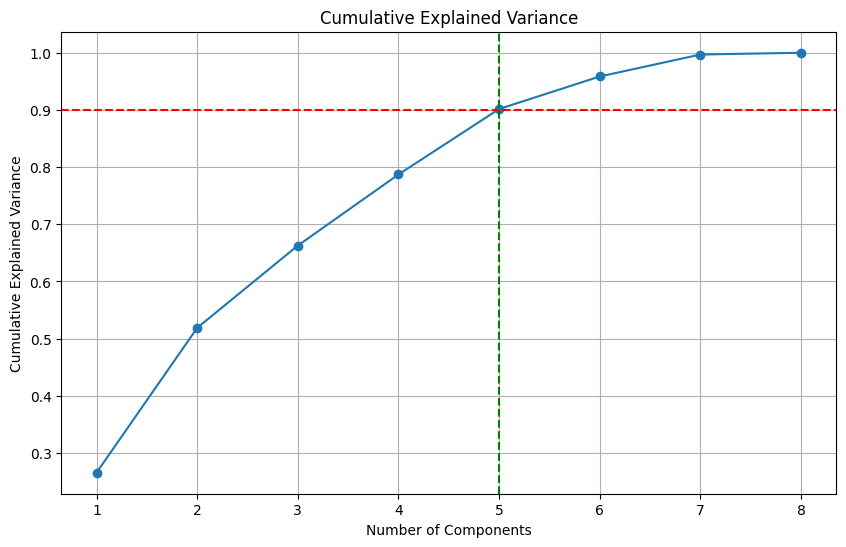


Evaluating Full Features Model

Classification Report (Fold 1):
              precision    recall  f1-score   support

           1       0.89      0.89      0.89         9
           2       0.90      0.90      0.90        10
           3       1.00      1.00      1.00         2

    accuracy                           0.90        21
   macro avg       0.93      0.93      0.93        21
weighted avg       0.90      0.90      0.90        21



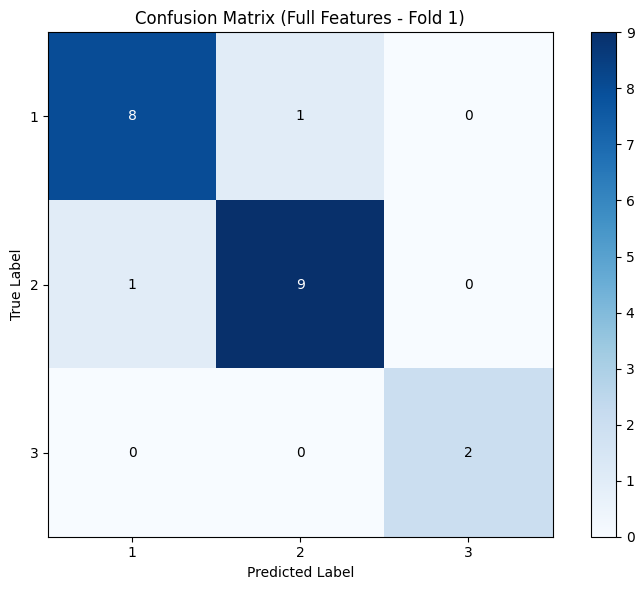


Full Features Performance Summary (8-fold CV):
Average Accuracy: 0.8333 ± 0.0532
Average F1 Score: 0.8333 ± 0.0554
Accuracy Range: 0.7619 - 0.9048

Evaluating PCA-Reduced (5 components) Model

Classification Report (Fold 1):
              precision    recall  f1-score   support

           1       0.73      0.89      0.80         9
           2       0.80      0.80      0.80        10
           3       0.00      0.00      0.00         2

    accuracy                           0.76        21
   macro avg       0.51      0.56      0.53        21
weighted avg       0.69      0.76      0.72        21



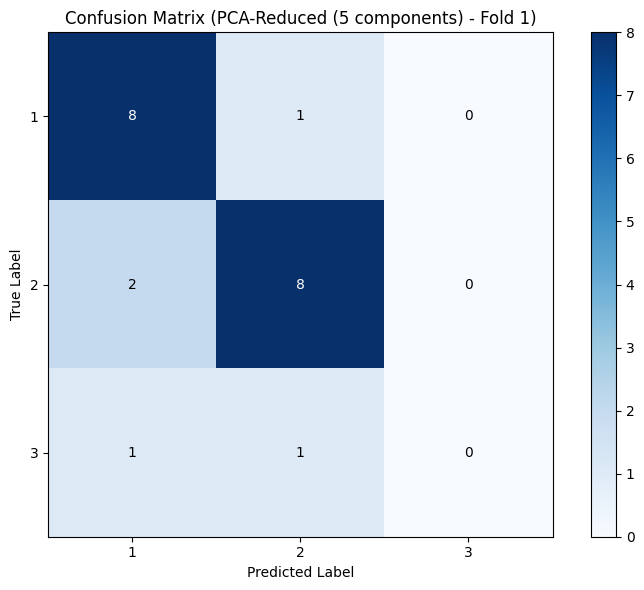


PCA-Reduced (5 components) Performance Summary (8-fold CV):
Average Accuracy: 0.7321 ± 0.0671
Average F1 Score: 0.7159 ± 0.0757
Accuracy Range: 0.6190 - 0.8571

Model Comparison Summary
Model                          Dimensions      Accuracy   F1 Score  
------------------------------------------------------------
Full Features                  8               0.8333     0.8333
PCA-Reduced (5 components)     5               0.7321     0.7159

Accuracy Difference: -0.1012
F1 Score Difference: -0.1175


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import (accuracy_score, classification_report,
                            confusion_matrix, f1_score)
import warnings

# Suppress specific warnings
warnings.filterwarnings('ignore', category=UserWarning, module='sklearn')

def load_data():
    df = pd.read_csv('preprocessed_glass.csv')
    X = df.drop('GlassType', axis=1)
    y = df['GlassType']

    # Print class distribution
    print("\nClass Distribution:")
    print(y.value_counts().sort_index())

    return X.values, y.values

def perform_pca(X):
    pca = PCA()
    X_pca = pca.fit_transform(X)

    cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
    n_components = np.argmax(cumulative_variance >= 0.90) + 1

    print(f"\nPCA Analysis Results:")
    print(f"Original dimensions: {X.shape[1]}")
    print(f"Components needed for 90% variance: {n_components}")
    print(f"Explained variance: {cumulative_variance[n_components-1]:.2%}")

    # Visualize explained variance
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, len(cumulative_variance)+1), cumulative_variance, 'o-')
    plt.axhline(y=0.9, color='r', linestyle='--')
    plt.axvline(x=n_components, color='g', linestyle='--')
    plt.title('Cumulative Explained Variance')
    plt.xlabel('Number of Components')
    plt.ylabel('Cumulative Explained Variance')
    plt.grid(True)
    plt.show()

    pca = PCA(n_components=n_components)
    return pca.fit_transform(X), n_components

def evaluate_model(X, y, model_name=""):
    model = RandomForestClassifier(random_state=42)
    cv = StratifiedShuffleSplit(n_splits=8, test_size=0.2, random_state=42)

    accuracies = []
    f1_scores = []

    print(f"\n{'='*50}")
    print(f"Evaluating {model_name} Model")
    print('='*50)

    for fold, (train_idx, test_idx) in enumerate(cv.split(X, y)):
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]

        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        acc = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred, average='weighted')
        accuracies.append(acc)
        f1_scores.append(f1)

        if fold == 0:
            # Handle zero_division explicitly
            print("\nClassification Report (Fold 1):")
            print(classification_report(y_test, y_pred, zero_division=0))

            # Plot confusion matrix
            cm = confusion_matrix(y_test, y_pred)
            plt.figure(figsize=(8, 6))
            plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
            plt.title(f'Confusion Matrix ({model_name} - Fold 1)')
            plt.colorbar()
            plt.xlabel('Predicted Label')
            plt.ylabel('True Label')
            plt.xticks(np.arange(len(np.unique(y))), np.unique(y))
            plt.yticks(np.arange(len(np.unique(y))), np.unique(y))

            # Add text annotations
            for i in range(cm.shape[0]):
                for j in range(cm.shape[1]):
                    plt.text(j, i, format(cm[i, j], 'd'),
                             ha="center", va="center",
                             color="white" if cm[i, j] > cm.max()/2 else "black")
            plt.tight_layout()
            plt.show()

    # Print performance summary
    print(f"\n{model_name} Performance Summary (8-fold CV):")
    print(f"Average Accuracy: {np.mean(accuracies):.4f} ± {np.std(accuracies):.4f}")
    print(f"Average F1 Score: {np.mean(f1_scores):.4f} ± {np.std(f1_scores):.4f}")
    print(f"Accuracy Range: {min(accuracies):.4f} - {max(accuracies):.4f}")

    return np.mean(accuracies), np.mean(f1_scores)

def main():
    X, y = load_data()
    X_pca, n_components = perform_pca(X)

    # Evaluate models
    full_acc, full_f1 = evaluate_model(X, y, "Full Features")
    pca_acc, pca_f1 = evaluate_model(X_pca, y, f"PCA-Reduced ({n_components} components)")

    # Final comparison
    print("\n" + "="*50)
    print("Model Comparison Summary")
    print("="*50)
    print(f"{'Model':<30} {'Dimensions':<15} {'Accuracy':<10} {'F1 Score':<10}")
    print(f"{'-'*60}")
    print(f"{'Full Features':<30} {X.shape[1]:<15} {full_acc:.4f}{'':<4} {full_f1:.4f}")
    print(f"{f'PCA-Reduced ({n_components} components)':<30} {n_components:<15} {pca_acc:.4f}{'':<4} {pca_f1:.4f}")
    print(f"\nAccuracy Difference: {pca_acc - full_acc:.4f}")
    print(f"F1 Score Difference: {pca_f1 - full_f1:.4f}")

if __name__ == "__main__":
    main()